# Lab2

## Business Understanding (10 points total).  
[10 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Why is this data important and how will you know if you have gathered useful knowledge from the dataset? Be specific and use your own words to describe the aspects of the data.

The dataset is a collection of comments about Donald Trump on Reddit. This data is important because it gives us some sort of indication of the millenials' thoughts on the memelord. It's hard to differentiate between what the media thinks of Donald and what the people think of Donald. We know we have gathered useful knowledge from the dataset if we are able to confidently associate certain words or phrases that people use to describe Donald.

### Data Encoding (45 points total)
[10 points] Read in your document data as strings.

### Load data

In [1]:
# Load in data
with open('reddit_trump_dataset.txt', encoding="utf8") as f:
    comments = f.readlines()
comments = [x.strip() for x in comments]
comments = list(filter(None, comments))

In [2]:
# Sample because the whole dataset doesn't load when I use the bag of words model
import random

sampleComments = []
for i in range(10000):
    sampleComments.append(comments[i])

In [3]:
sampleComments

['Points|Replies|Composite_Score|Meta|Submission_Location|Title|latlon|Comments__count_|Post|Comments|Post_Date|Post_location|Post_organization|replies__person|Replies_Geo|Post_Extracted_Key_Phrases|replies__location|replies__organization',
 '|"Her mother was 17 years old when she was born, according to Wikipedia.  Her father was 20 years older (37 yrs).  Does that maybe make him a pedo?',
 'permalinkembedsavereportgive goldreply[–]YouFellAsleep-WakeUpUSA 10 11 12  1 day ago\xa0(0 children)Her father is also her grandfather.',
 'permalinkembedsaveparentreportgive goldreply[–]CBruceIL 32 33 34  1 day ago\xa0(1 child)No. Pedophilia is specifically an attraction to pre-pubescent children. A 17 year old who can get pregnant is clearly not that.',
 'permalinkembedsaveparentreportgive goldreply[–]ArcadianDelSolMO 15 16 17  1 day ago*\xa0(3 children)no, because her mother was a hog. Technically its bestiality.',
 "edit: to those messaging me that my opinions on what she said doesn't mean her 

We can tell from a glance that the data has not been cleaned and is literally a copy paste text dump, as the text for the reddit buttons on each comment are still there. So are the numbers for the points based on how many people upvoted the comment.

[15 points] Verify data quality: remove words from the vocabulary that are not relevant or that you think should not be included. Alternatively, choose a specific vocabulary to choose for your data. 

### Set dictionary for Bag of words model

There are words that probably do not provide us with any significant information such as "the" "that" "which" etc.

To combat this these words will be filtered by "relevance" using tfidf

There are a lot of ascii art, puns, ascii faces, words in other languages, etc. that do provide us with information (ex. (╯°□°）╯︵ ┻━┻) probably means angry), but it's hard to interpret that information especially since it changes dramatically with context. Words on the other hand are context sensitive, but less so.
 
To combat these issues, I'm going to be using an ENGLISH dictionary including SLANG

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# read in scrabble dictionary from file
with open('ospd.txt') as f:
    vocab = f.read().split('\n')
    
# now lets do the transformation with a custom vocabulary
tfidf_vect = TfidfVectorizer(vocabulary=vocab)

[10 points] Convert the data from raw text into a sparse encoded bag-of-words representation.   

### Create Bag of words model

In [5]:
count_vect = CountVectorizer() # an object capable of counting words in a document!

# count_vect.fit(summary_text)
# count_vect.transform(summary_text)
bag_words = count_vect.fit_transform(sampleComments)

In [6]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(10000, 12675)
  (0, 9482)	1
  (0, 9481)	1
  (0, 8755)	1
  (0, 9484)	1
  (0, 9483)	1
  (0, 8757)	1
  (0, 8756)	1
  (0, 8754)	1
  (0, 2564)	1
  (0, 8753)	1
  (0, 2565)	1
  (0, 6467)	1
  (0, 11431)	1
  (0, 10839)	1
  (0, 7124)	1
  (0, 2617)	1
  (0, 9480)	1
  (0, 8397)	1


In [7]:
# now let's create a pandas API out of this
import pandas as pd

pd.options.display.max_columns = 99
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [8]:
print(df)

      00  000  0000  0003  000462  000carlosdanger000  007meow  008  01  \
0      0    0     0     0       0                   0        0    0   0   
1      0    0     0     0       0                   0        0    0   0   
2      0    0     0     0       0                   0        0    0   0   
3      0    0     0     0       0                   0        0    0   0   
4      0    0     0     0       0                   0        0    0   0   
5      0    0     0     0       0                   0        0    0   0   
6      0    0     0     0       0                   0        0    0   0   
7      0    0     0     0       0                   0        0    0   0   
8      0    0     0     0       0                   0        0    0   0   
9      0    0     0     0       0                   0        0    0   0   
10     0    0     0     0       0                   0        0    0   0   
11     0    0     0     0       0                   0        0    0   0   
12     0    0     0     0

 Knowing the dataset and the kind of things users will spam, I think the data is clean.

### Data Visualization (35 points total)
[20 points] Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. Choose visualizations that you think summarize your data best.

### Imports

In [9]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats.mstats as mstats
warnings.simplefilter('ignore', DeprecationWarning)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

%matplotlib inline

### Word frequencies

In [10]:
print_full(df.sum().sort_values()[-200:])

every                                  162
anything                               164
let                                    166
everyone                               166
fucking                                166
23                                     166
points10                               167
plan                                   167
executive                              170
lot                                    171
minutes                                172
american                               172
points9                                174
something                              176
government                             177
its                                    177
someone                                177
country                                178
same                                   181
media                                  182
countries                              184
first                                  187
take                                   188
isn        

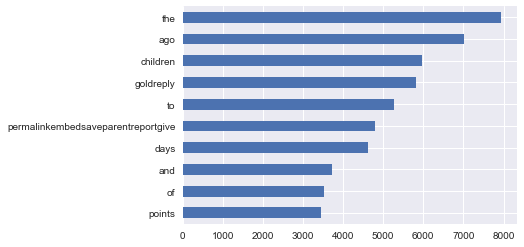

In [11]:
# print out 10 most common words in our 
df.sum().sort_values()[-10:].plot(kind='barh')

This dataset does not represent what is important specifcally in the document, but it does show us information about the english language and the reddit comment format. "The" "ago" "of" "to" are all frequent words in the english language and are used

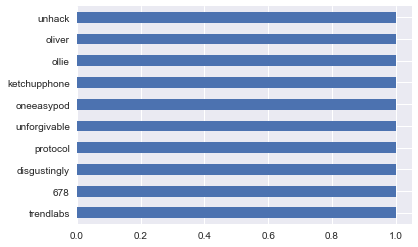

In [12]:
# print out 10 least common words in our data
df.sum().sort_values()[:10].plot(kind='barh') # small sample size means most words occur one time

This seems to be true. Words/phrases like ketchuphone, trendlabs, oliver, and unhack are quite uncommon. This is why we only see it once in our dataset.

### Most relevant words

[10 points] Convert the data into a sparse encoded tf-idf representation.

In [13]:
tfidf_vect = TfidfVectorizer() # an object capable of counting words in a document!

tfidf_mat = tfidf_vect.fit_transform(sampleComments) # that's it! its converted!!

In [14]:
# convert to pandas to get better idea about the data
most_relevant_df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())

In [15]:
# print out 10 words with max tfidf, normalized by document occurrence
most_relevant_df.max().sort_values()[-60:]

please                       0.999656
democracy                    1.000000
djt                          1.000000
nounformal                   1.000000
donaldputin                  1.000000
pepe                         1.000000
empiredidnothingwrong        1.000000
oh                           1.000000
is                           1.000000
privatised                   1.000000
0l                           1.000000
alt_nasa                     1.000000
no                           1.000000
wrong                        1.000000
maga                         1.000000
badhombrenps                 1.000000
lol                          1.000000
actualepafacts               1.000000
anyone                       1.000000
thanks                       1.000000
the                          1.000000
timeline                     1.000000
bit                          1.000000
altusfws                     1.000000
altstatedpt                  1.000000
altnih                       1.000000
altnatparkse

Only 59 words have a max tf-idf.

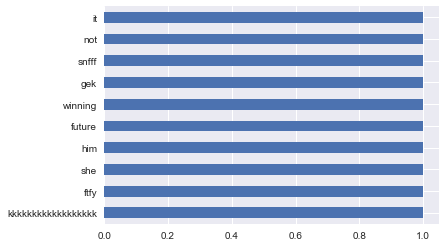

In [16]:
# print out 10 words with max tfidf, normalized by document occurrence
most_relevant_df.max().sort_values()[-10:].plot(kind='barh')

The tf-idf seems to pick up a lot of strange words like 'donaldputin'. A lot of these terms explain the public opinion of Donald Trump. Some words that come to mind include: winning, future, privatised, blasphemy, ridiculous, and democracy. A lot of these are combinations of words that the CountVectorizer thinks is 1 word therefore we get a high tf-idf because these combinations of words are unique. Some times people think combining a certain set of words into 1 word like "donaldputin" and "empiredidnothingwrong" is funny.

Democracy was a word I thought would have a lower tf-idf but I'm assuming some users just made a comment saying democracy only.

### Vocabulary size

In [17]:
len(df.max())

12675

The vocabulary is pretty small. The vocabulary space of the people using reddit seems small. Perhaps the intelligence of the Reddit community is represented by this.

In [18]:
len(df.max()) / len(vocab)

0.15975548273254347

Based on our imported vocab, Reddit Trump posters are only using ~16% of the dictionaries words. This could be due to filtering of combinations of words, phrases, abbreviations, and slang words.

[15 points] For each target class, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? If you have many target classes, choose a representative subset of classes to perform this visualization. 

We only have 1 target class of users, posters in the Trump subreddit. We really can't compare the differences between 2 different classes. If we had combined posts from Hilary and Trump subreddits this could of been done. Based on our 1 class of users and after removing words/tokens that are part of a lot of comments, we can see that Trump is the first word after a ton of stop words. Some other conclusions is that non of the relevant words can be found in the top 200 most frequent words.

# Extra Work

We can see that words on their own do display information on their own, but as discussed above, the english language is context sensitive, and a word's meaning may vary depending on the surrounding words.

An interesting idea I have is to combine words into pairs in each of the documents. Although word pairs do not capture the whole contextual knowledge, it will be more than what there is using single words. In doing this I hope to capture more contextual data.

## Word Cloud

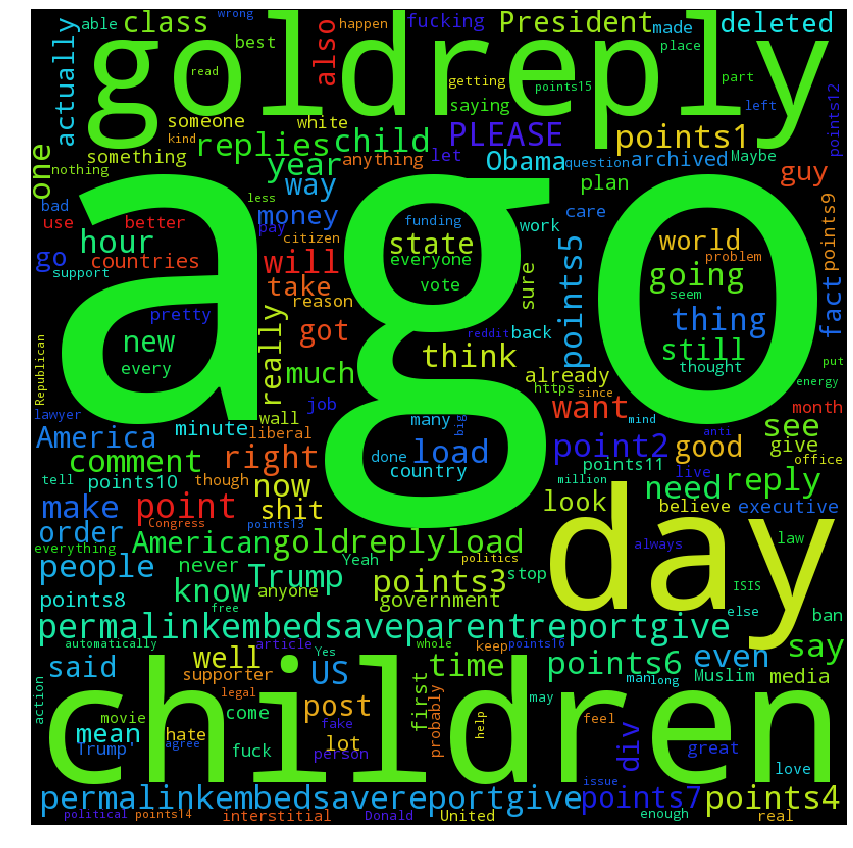

In [37]:
from wordcloud import WordCloud, STOPWORDS

text = 'all your base are belong to us all of your base base base'
wordcloud = WordCloud(scale = 1,
                      width=800,
                      height=800,
                      ).generate(' '.join(sampleComments))

plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Some words I notice that isn't Reddit formatting is politics, liberal, money, country, million, citizen, Obama, America, President, pay, Donald, Trump, and people.